# Network Analysis

Escorts in Brazil

Description:

A bipartite network of escort and individuals who buy sex from them in Brazil, extracted from a Brazilian online community for such ratings. Edges represent a purchase of sexual intercourse with an escort, and the edge weight gives the buyer's rating of the escort: -1 (bad), 0 (neutral), or +1 (good). Other edge attributes are available. Edges are timestamped

source: https://networks.skewed.de/net/escorts

In [40]:
import pandas as pd
import networkx as nx
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns
import numpy as np
from collections import Counter

plt.style.use('seaborn-deep')

In [41]:
nodes = pd.read_csv("data/nodes.csv", delimiter=",")
edges = pd.read_csv("data/edges.csv", delimiter=",")

In [42]:
nodes.head()

,# index,male,_pos
0,0,1,"array([ 8.06509566, -4.79831958])"
1,1,0,"array([10.29703936, -0.66717811])"
2,2,1,"array([ 9.92182567, -4.76662867])"
3,3,1,"array([6.05523749, 3.87640768])"
4,4,0,"array([ 1.70757915, -3.86779503])"


In [43]:
edges.head()

,# source,target,time,rating,anal,oral,kiss
0,0,1,0,0,0,0,0
1,0,4,21,0,0,0,0
2,0,12,216,0,0,0,0
3,0,34,223,0,0,0,0
4,0,43,245,0,0,0,0


## Edges

In [44]:
edges.columns

Index(['# source', ' target', ' time', ' rating', ' anal', ' oral', ' kiss'], dtype='object')

In [45]:
edges = edges.rename(str.strip, axis='columns')
removed_cols = ["rating", "anal", "oral", "kiss", "time"]
edges = edges.rename(columns={"# source": "source", "target": "target"}).drop(columns=removed_cols)

In [46]:
edges.head()

,source,target
0,0,1
1,0,4
2,0,12
3,0,34
4,0,43


## Nodes

In [47]:
nodes.columns

Index(['# index', ' male', ' _pos'], dtype='object')

In [48]:
nodes = nodes.rename(str.strip, axis='columns')
nodes = nodes.rename(columns={"# index": "id", "_pos": "pos"})

removed_cols = ["pos"]
nodes = nodes.drop(columns=removed_cols)

## Create bipartite graph

In [49]:
# create graph
G = nx.Graph()

# split nodes into 2 groups
customers = nodes[nodes.male == 1]
escorts = nodes[nodes.male == 0]

# Add nodes
G.add_nodes_from(customers, bipartite=0)
G.add_nodes_from(escorts, bipartite=1)

# add eges
for _, row in edges.iterrows():
    G.add_edge(row['source'], row['target'])

#temp = [G.add_edge(row['source'], row['target']) for _, row in edges.iterrows()]

In [50]:
print(f"Number of customers: {len(customers)}")
print(f"Number of customers: {len(escorts)}")

Number of customers: 6624
Number of customers: 10106


In [51]:
#G.edges.data()
#G.nodes.data()

G.remove_node("id")
G.remove_node("male")

In [52]:
# Never made it to the end ...

#pos = nx.kamada_kawai_layout(G)

#nx.draw(G, node_color="skyblue", pos = pos)

### Distribution of degrees of mixed group

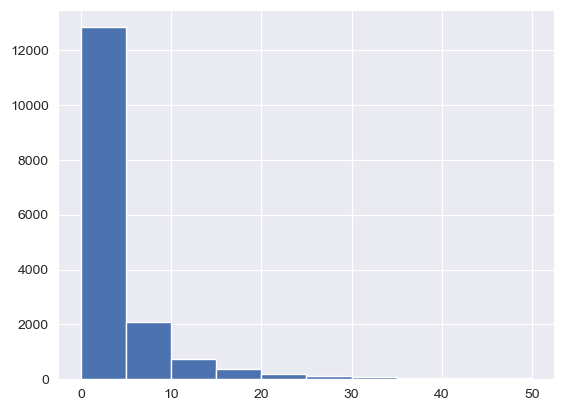

In [53]:
%matplotlib inline

degree_list = [k for v,k in nx.degree(G)]
plt.hist(degree_list, range =(0, 50), edgecolor = "black")
plt.show()

In [54]:
# Split degree lists
customers_degrees = [(node, val) for (node, val) in G.degree() if node in customers["id"].tolist()]
escorts_degrees = [(node, val) for (node, val) in G.degree() if node in escorts["id"].tolist()]

### Distribution of degrees of customers vs escorts

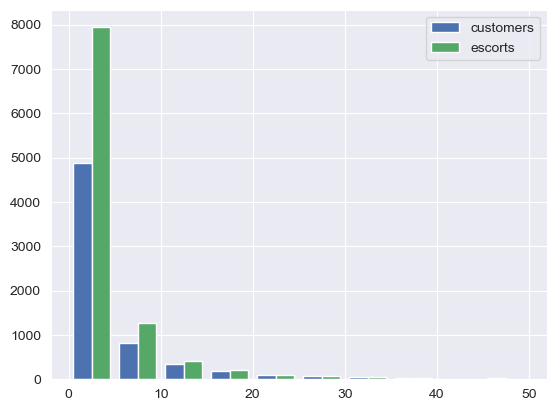

In [55]:
%matplotlib inline
plt.style.use('seaborn-deep')

customer_degree_list = [k for v,k in customers_degrees]
escorts_degree_list = [k for v,k in escorts_degrees]

split_list = [customer_degree_list, escorts_degree_list]

plt.hist(split_list, label=['customers', 'escorts'], range =(0, 50), edgecolor = "black")
plt.legend(loc='upper right')
plt.show()

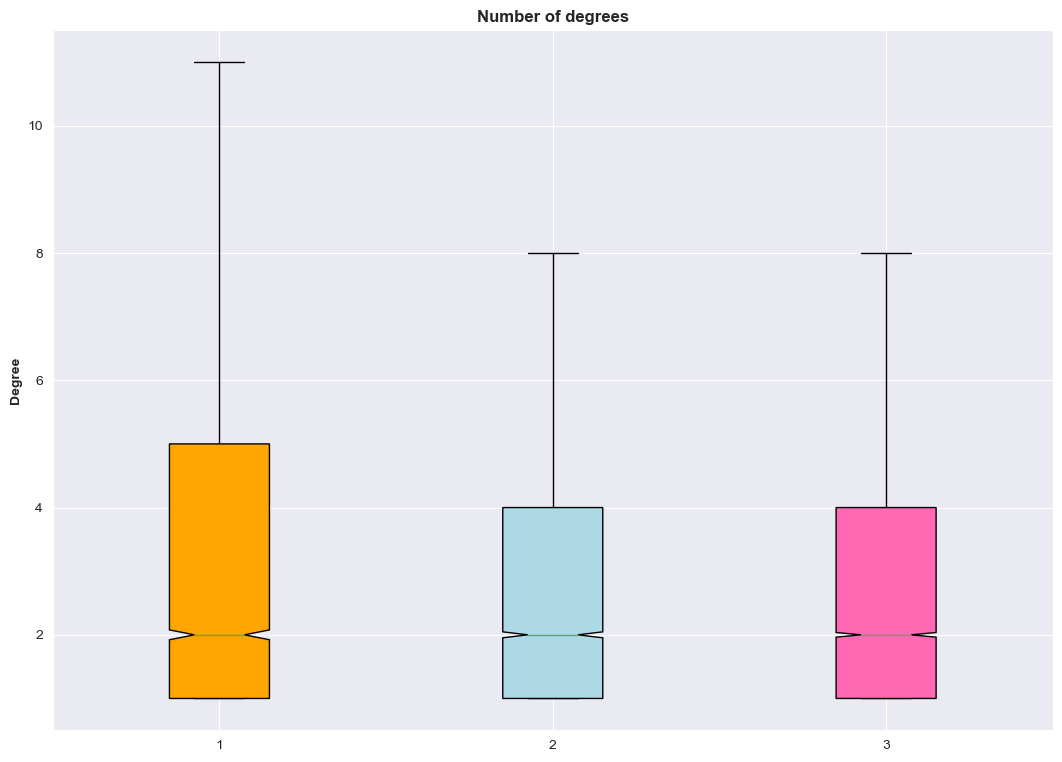

In [56]:
split_list = [customer_degree_list, escorts_degree_list, degree_list]

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

ax.set_title('Number of degrees',
             fontweight ="bold")

ax.set_ylabel('Degree',
              fontweight ='bold')

# Creating plot
bp = ax.boxplot(split_list, showfliers=False, notch ='True', patch_artist = True)

# orange for mixed, blue for boys and pink for girls
colors = ['#ffa500', '#add8e6', '#FF69B4']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

### Network Centrality

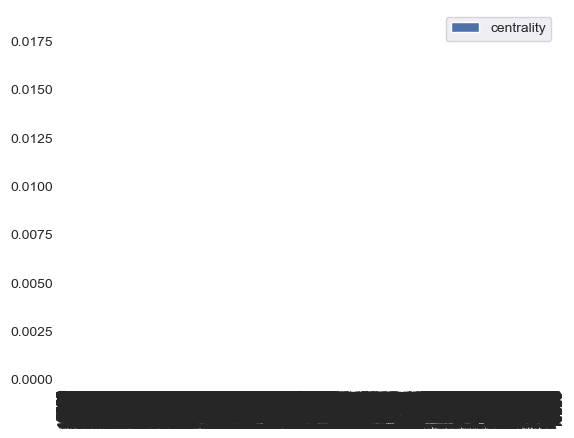

In [59]:
centrality_dict = nx.degree_centrality(G)
centrality_df = pd.DataFrame.from_dict(centrality_dict, orient="index", columns=["centrality"])

centrality_df.sort_values('centrality', ascending=False).plot(kind="bar");

### Betweennes Centrality

In [60]:
betweennes_dict = nx.betweenness_centrality(G)

betweennes_centrality_df = pd.DataFrame.from_dict(betweennes_dict, orient="index", columns=["centrality"])

betweennes_centrality_df.sort_values('centrality', ascending=False).plot(kind="bar");

KeyboardInterrupt: 

### Closeness Centrality

In [ ]:
closeness_dict = nx.closeness_centrality(G)

closeness_centrality_df = pd.DataFrame.from_dict(closeness_dict, orient="index", columns=["centrality"])

closeness_centrality_df.sort_values('centrality', ascending=False).plot(kind="bar");

### Community Detection

In [5]:
import community as community_louvain

In [3]:
communities = community_louvain.best_partition(G)

AttributeError: module 'community' has no attribute 'best_partition'